In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from random import randint
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew

# Visibility Setting

# I. Exploratory Data Analysis (EDA)

This segment is inspired by Sunil from https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

The step is shown as followed:
0. Integrity of Input
1. Varible Overview
2. Outlier Treatment
3. Variable Transformation
4. Variable Creation

In [2]:
# import data from csv files
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# specify the output file
output = pd.read_csv('data/sample_submission.csv')

# Check the shape of IO
train.shape, test.shape, output.shape

((250, 302), (19750, 301), (19750, 2))

## Step0: Check the integrity of input

In [3]:
# check if there's any missing value 
print(train.isnull().any().any())
print(test.isnull().any().any())

False
False


## Step1: Variable Overview
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis

### 1. Variable Indentification
Observe the Predictor (column[2:]) and Target (colunmn["target"])

### 2. Univariate Analysis
Observing all the varibles are of `continuous` type, we perform analysis on central tendancy and spread of the variables.

- Check Central Tendancy (Mean)
- Measure Dispersion (Standard Deviation)
- Visualize Distribution (Boxplot & Histogram)

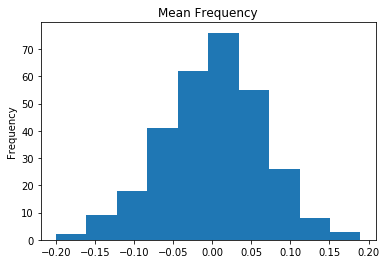

In [4]:
# check the mean value to show 
train[train.columns[2:]].mean().plot(kind='hist');
plt.title('Mean Frequency');

# sns.distplot(train['target'] , fit=norm);

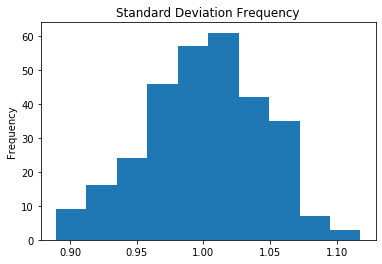

In [5]:
# check the standard deviation to show how far the values are spread above and below the mean.
train[train.columns[2:]].std().plot(kind="hist")
plt.title('Standard Deviation Frequency');

Distributions of 10 random colums‘s values


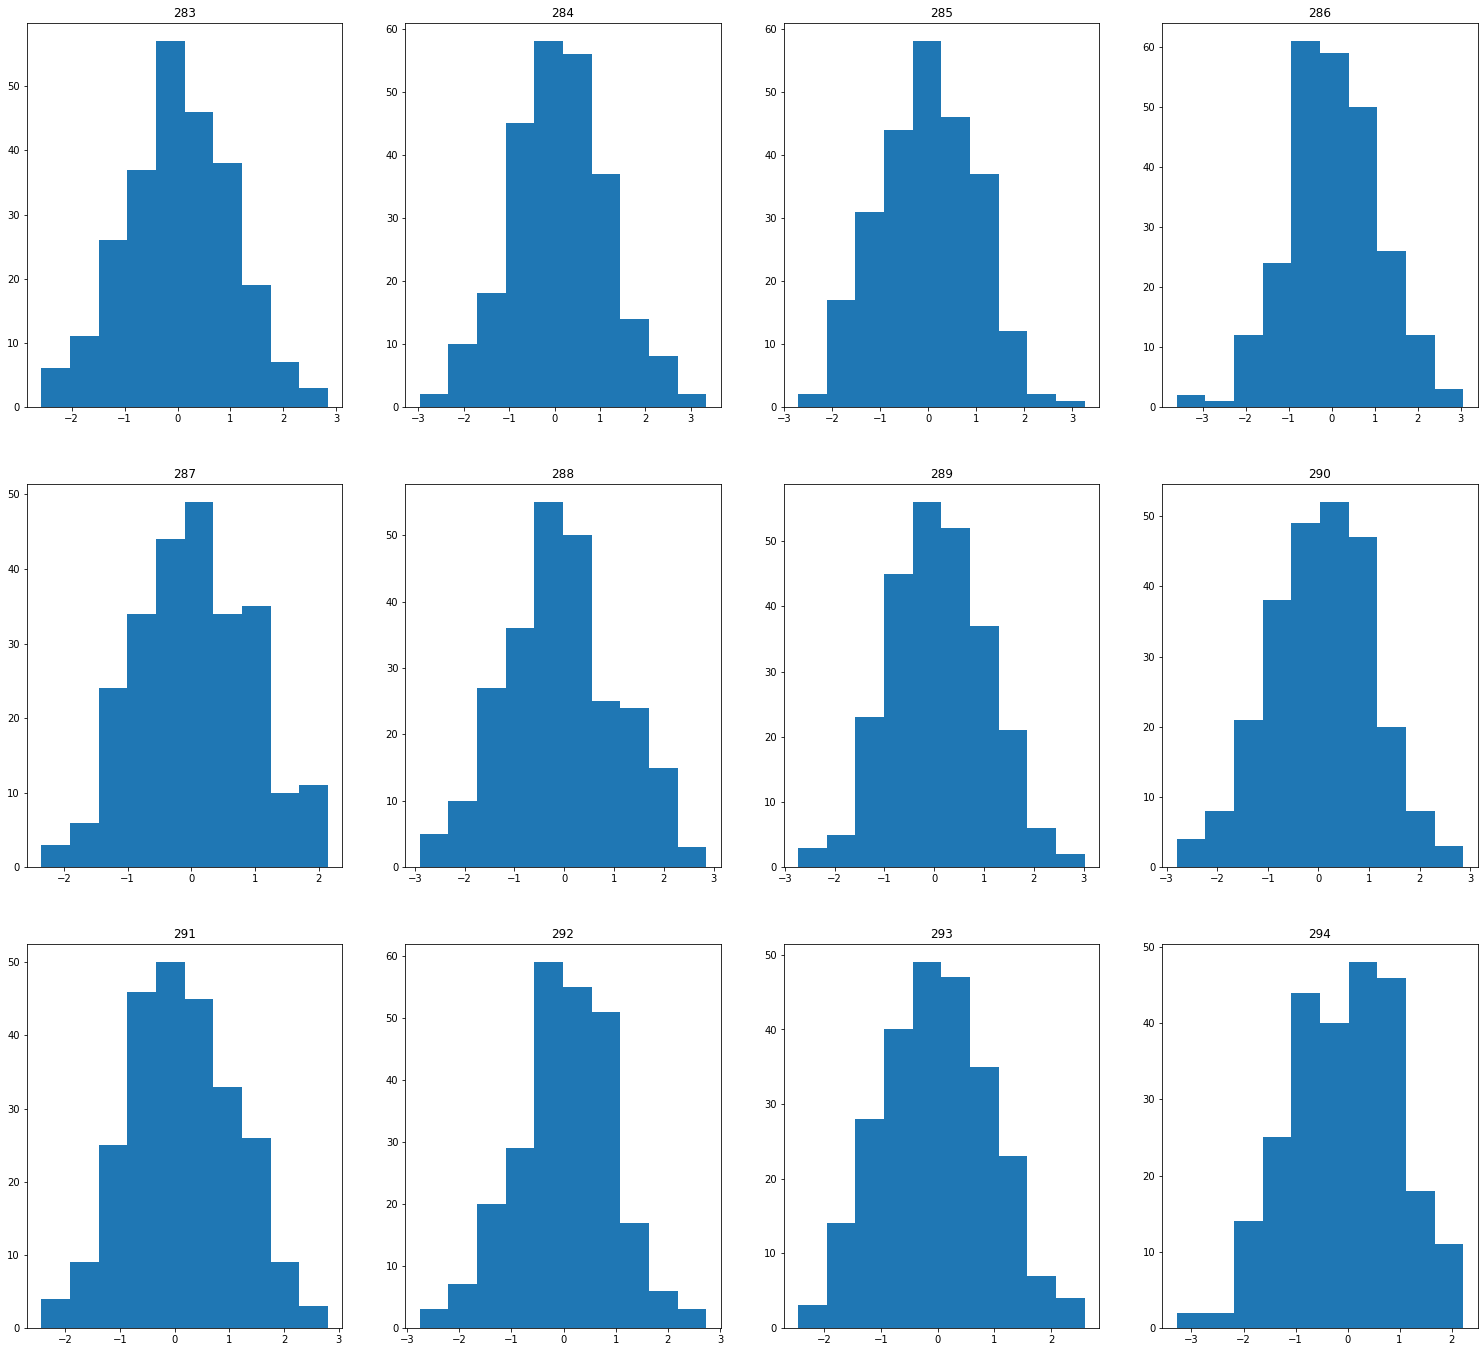

In [6]:
# Randomly show a few columns' std and mean
print('Distributions of 10 random colums‘s values')
plt.figure(figsize=(26, 24))
rand_int = randint(2, 289)
for i, col in enumerate(list(train.columns)[rand_int:rand_int+12]):
    plt.subplot(3, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)

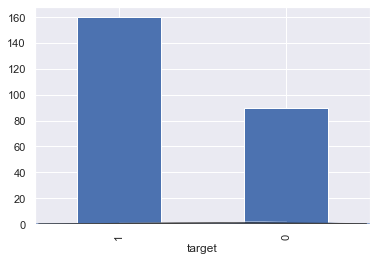

In [38]:
# show the distribution of target values is imbalanced
train['target'].value_counts().plot.bar();

sns.distplot(train['target'] , fit=norm);

Based on the above analysis, we could conclude that:
1. columns have mean of [-0.15, 0.15]
2. standard deviation of columns is around [0.9, 1.1]
3. values among different columns(features) are quite similar
4. target values are binary and imbalanced

### 3. Bi-variate Analysis
This part analyzes the correlations among varibles

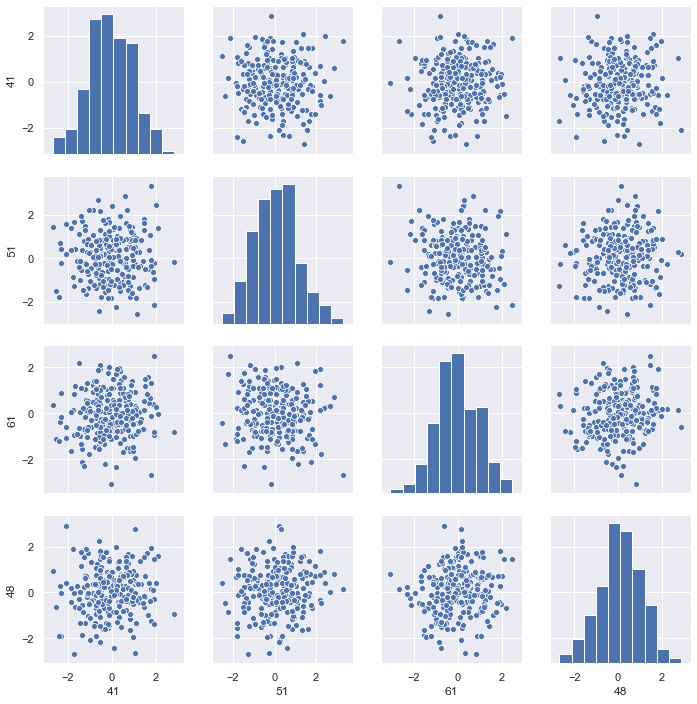

In [10]:
# Use Scatterplot to find interesting correlations between variables
sns.set()
rand_int = randint(2, 200)
cols = [str(rand_int), str(rand_int + 10), str(rand_int + 20), str(rand_int + 7)]
sns.pairplot(train[cols], height = 2.5)
plt.show();

After rounds of testing, we conclude that there's no strong correlations between two variables pair

## Step2: Outlier Treatment

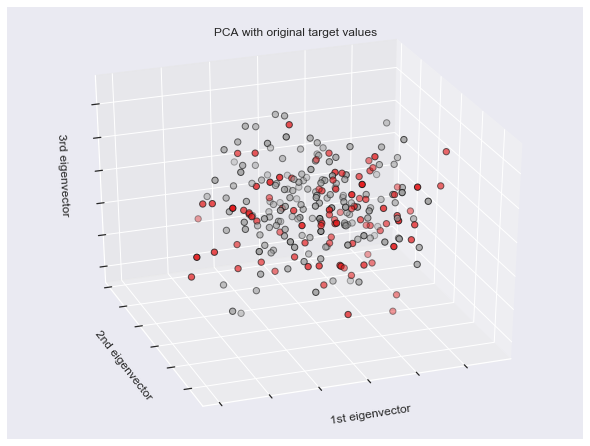

In [17]:
X = np.matrix(train.drop(['id','target'], axis=1))
Y = np.array(train['target'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA with original target values")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Step3: Variable Transformation

In [32]:
print(train.corr().target.sort_values(ascending=False).head(20))

target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
164       0.124151
101       0.118379
272       0.113909
226       0.113660
17        0.110998
105       0.110589
0         0.108966
244       0.108147
13        0.107828
176       0.099790
Name: target, dtype: float64


## Step4: Variable Creation

# II. Modeling & Feature Selection

In [26]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id'], axis=1)
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
repeated_folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)